In [3]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [ ]:
import pandas as pd
df = pd.read_csv('listings.csv')
df.head()
df.info()
df.isnull().sum().sort_values(ascending=False)
df['price'].head()


,price
0,$85.00
1,$150.00
2,$975.00
3,$100.00
4,$450.00


In [ ]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

feature selection and missing value handling

In [ ]:
selected_columns = ['accommodates',
                    'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews',
                    'review_scores_rating', 'availability_365', 'price']

df = df[selected_columns]

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())



Key Visualizations

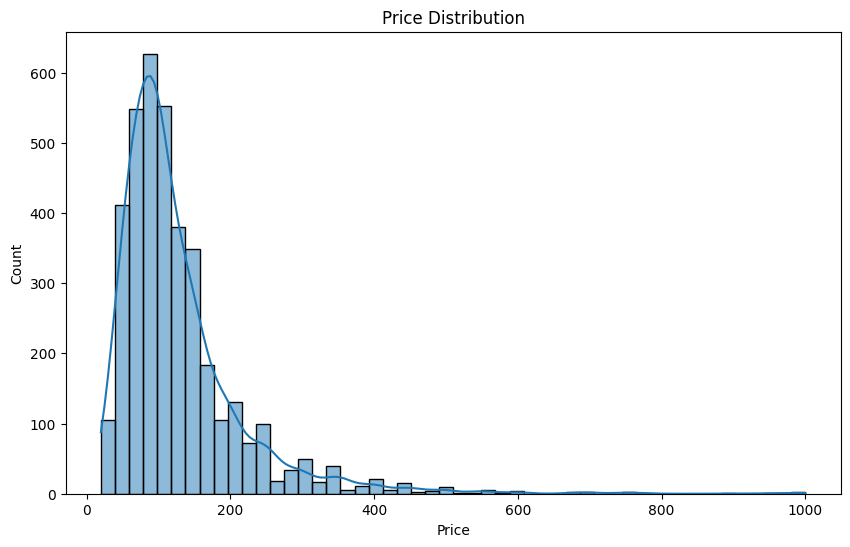

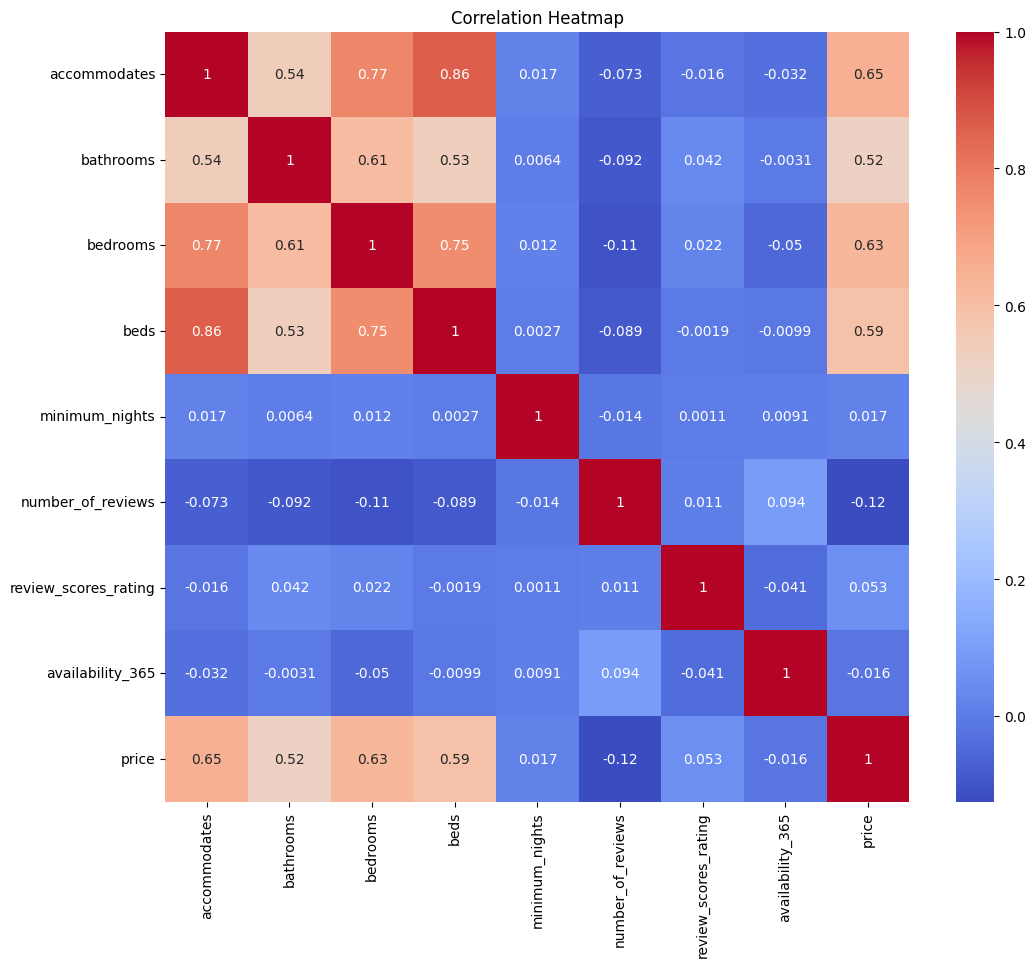

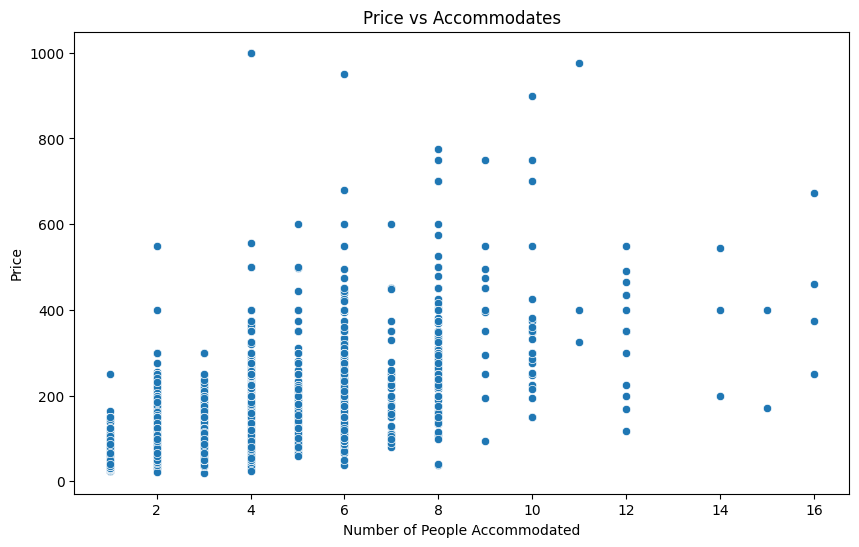

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='accommodates', y='price', data=df)
plt.title('Price vs Accommodates')
plt.xlabel('Number of People Accommodated')
plt.ylabel('Price')
plt.show()


**Price distribution plot**

Most Airbnb listings are priced between 50 and 200 dollars.

 The peak (highest count) is around $100 → most common listing price.

 A long tail → a few expensive listings priced even above $500–$1000 dollars(possible luxury properties).

 The distribution is not normal → it's skewed → may need a log transformation if applying linear regression.




**Correlation Heatmap**

Focus on features like accommodates, bedrooms, beds, bathrooms → they strongly influence price.



**Scatter Plot: Price vs Accommodates**

Price tends to increase as accommodation size increases.

 Price variability indicates influence of other factors (like location, amenities, property type).


In [ ]:
df = pd.get_dummies(df, columns=['neighbourhood_cleansed', 'property_type', 'room_type'], drop_first=True)

# This code converts categorical variables into numerical form by creating dummy (binary) columns for each unique category in the selected columns.

Train-Test Split

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Handle Missing Values And Model Training

In [ ]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 35.574282547078674
Mean Squared Error (MSE): 3267.7766784980627
Root Mean Squared Error (RMSE): 57.16447042086599
R² Score: 0.5973812330721169


**Mean Absolute Error (MAE): 35.57**

On average, your model’s predictions are off by 35.57 units from the actual price.

**Mean Squared Error (MSE): 3267.77**

It is the average of squared differences between actual and predicted prices.

**Root Mean Squared Error (RMSE): 57.16**  

On average, your model’s predictions are about 57.16 units away from the actual prices.


R² Score: 0.5973

The model explains about 59.73% of the variability in the price data.









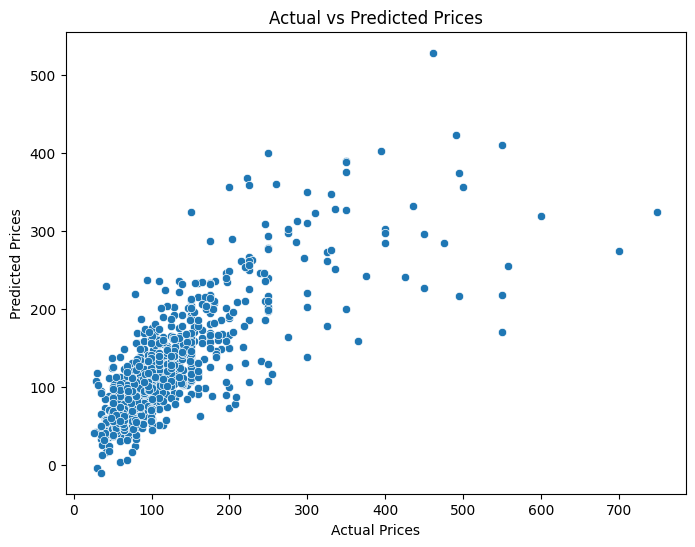

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

The plot reveals a positive linear trend, indicating a general increase in predicted prices as actual prices rise. Most of the lower-priced listings closely align with their predicted values, suggesting the model performs well for more affordable listings, with potential variance at higher price points .